In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Support Functions

In [2]:
def get_df_null_info(df):
    '''analzyse sparse columns (= many NaNs/Null-Values)'''
    nulls:pd.Series =df.isnull().sum(axis = 0).sort_values(ascending = False)
    df_null_info:pd.DataFrame = pd.DataFrame(data={
        'nulls_amount': nulls,
        'nulls_percentage': nulls.apply(lambda row: round((row/df.shape[0])*100,2))
    })
    return df_null_info

# Get to know the data

In [3]:
# load dataset
df_source = pd.read_csv("germany_housing_data_14.07.2020.csv", sep=",")

# check how many null values are inside of dataset
df_null_info = get_df_null_info(df_source)
df_null_info

,nulls_amount,nulls_percentage
Energy_consumption,8119,76.94
Year_renovated,5203,49.31
Usable_area,4984,47.23
Energy_efficiency_class,4819,45.67
Bedrooms,3674,34.82
Free_of_Relation,3569,33.82
Energy_certificate_type,3526,33.42
Furnishing_quality,2726,25.83
Floors,2664,25.25
Garages,1960,18.57


In [4]:
# get some statistical information about dataset
df_source.describe(include="all")

,Unnamed: 0,Price,Type,Living_space,Lot,Usable_area,Free_of_Relation,Rooms,Bedrooms,Bathrooms,...,Energy_source,Energy_certificate,Energy_certificate_type,Energy_consumption,Energy_efficiency_class,State,City,Place,Garages,Garagetype
count,10552.000000,1.055200e+04,10150,10552.000000,10552.000000,5568.000000,6983,10552.000000,6878.000000,8751.000000,...,9325,9797,7026,2433.000000,5733,10551,10551,10262,8592.000000,8592
unique,NaN,NaN,11,NaN,NaN,NaN,705,NaN,NaN,NaN,...,104,3,2,NaN,9,16,534,4762,NaN,7
top,NaN,NaN,Mid-terrace house,NaN,NaN,NaN,nach Absprache,NaN,NaN,NaN,...,Gas,available,demand certificate,NaN,D,Nordrhein-Westfalen,Hannover (Kreis),Innenstadt,NaN,Garage
freq,NaN,NaN,4324,NaN,NaN,NaN,1383,NaN,NaN,NaN,...,4528,6987,4143,NaN,970,1660,107,32,NaN,4412
mean,5275.500000,5.566851e+05,NaN,216.721008,1491.659004,134.300424,NaN,7.388978,4.169817,2.308993,...,NaN,NaN,NaN,117.663111,NaN,NaN,NaN,NaN,2.698673,NaN
std,3046.244354,6.087410e+05,NaN,172.421321,8582.361675,188.814089,NaN,5.378126,2.577169,1.742330,...,NaN,NaN,NaN,54.023207,NaN,NaN,NaN,NaN,3.195068,NaN
min,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,...,NaN,NaN,NaN,5.100000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,2637.750000,2.500000e+05,NaN,130.000000,370.000000,48.000000,NaN,5.000000,3.000000,1.000000,...,NaN,NaN,NaN,83.170000,NaN,NaN,NaN,NaN,1.000000,NaN
50%,5275.500000,4.052150e+05,NaN,176.775000,656.500000,80.000000,NaN,6.000000,4.000000,2.000000,...,NaN,NaN,NaN,112.700000,NaN,NaN,NaN,NaN,2.000000,NaN
75%,7913.250000,6.550000e+05,NaN,250.000000,1047.000000,150.250000,NaN,8.000000,5.000000,3.000000,...,NaN,NaN,NaN,146.000000,NaN,NaN,NaN,NaN,3.000000,NaN


# Pre-Processing

### Data Reduction (Dimensionality Reduction)

In [5]:
# Drop all columns:
#  (a) with more than 30% null values
#  (b) 'City' & 'Place' because  'State', 'City', and 'Place' have same information but with different granularity
drop_col_percentage_treshold=26
cols_to_drop = list(df_null_info[(df_null_info['nulls_percentage'] > drop_col_percentage_treshold)].index.values) 
cols_to_drop.append('City')
cols_to_drop.append('Place')
print(f'Drop following columns: {cols_to_drop}')

df_source.drop(columns=cols_to_drop, inplace=True)

Drop following columns: ['Energy_consumption', 'Year_renovated', 'Usable_area', 'Energy_efficiency_class', 'Bedrooms', 'Free_of_Relation', 'Energy_certificate_type', 'City', 'Place']


### Data Cleaning (handle missing data)

In [6]:
df_null_info = get_df_null_info(df_source)
df_null_info

,nulls_amount,nulls_percentage
Furnishing_quality,2726,25.83
Floors,2664,25.25
Garagetype,1960,18.57
Garages,1960,18.57
Bathrooms,1801,17.07
Energy_source,1227,11.63
Energy_certificate,755,7.16
Year_built,694,6.58
Heating,584,5.53
Type,402,3.81


Start to clean each column.

In [7]:
# for column 'State' drop all rows with no state
df_source.drop(df_source[df_source['State'].isnull()].index, inplace=True)
df_source.loc[df_source['State'].isnull()]

# for all other columns: fill NaNs with mode value
for col in df_source:
    df_source[col].fillna(df_source[col].mode()[0], inplace=True)

In [8]:
df_source.sample(2)

,Unnamed: 0,Price,Type,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Furnishing_quality,Condition,Heating,Energy_source,Energy_certificate,State,Garages,Garagetype
345,345,579000.0,Duplex,167.5,630.0,7.0,3.0,3.0,1958.0,normal,maintained,stove heating,Öl,available,Baden-Württemberg,2.0,Garage
1081,1081,349000.0,Mid-terrace house,180.0,671.0,8.0,1.0,2.0,1973.0,normal,modernized,stove heating,Öl,available,Baden-Württemberg,1.0,Garage


### Data Cleaning (Outlier Removal)

In [9]:
df_source.dtypes

Unnamed: 0              int64
Price                 float64
Type                   object
Living_space          float64
Lot                   float64
Rooms                 float64
Bathrooms             float64
Floors                float64
Year_built            float64
Furnishing_quality     object
Condition              object
Heating                object
Energy_source          object
Energy_certificate     object
State                  object
Garages               float64
Garagetype             object
dtype: object

In [10]:
## remove outlier: z_score transformation

# get all numerical columns
cols_to_zscore = list(df_source.select_dtypes(include='float64'))
cols_to_zscore.remove("Price")
cols_zscore = []

# create df with zscore-columns 
for col in cols_to_zscore:
    col_zscore = col + '_zscore'
    cols_zscore.append(col_zscore)
    
    # zscore of x in column :    (x- col.mean)-col.std
    # -> add an extra column for zscore
    df_source[col_zscore] = (df_source[col] - df_source[col].mean())/df_source[col].std(ddof=0)


In [11]:
cols_zscore

['Living_space_zscore',
 'Lot_zscore',
 'Rooms_zscore',
 'Bathrooms_zscore',
 'Floors_zscore',
 'Year_built_zscore',
 'Garages_zscore']

In [12]:
treshhold = 3
treshhold_range = [-treshhold, treshhold]

df_source["max_zscore"] = df_source[cols_zscore].max(axis=1) 
df_source['min_zscore'] = df_source[cols_zscore].min(axis=1) 


df_source['is_outlier_zscore'] = (
    (treshhold <= df_source["max_zscore"]) | 
    (df_source["max_zscore"] <= -treshhold ) | 

    (treshhold  <= df_source["min_zscore"]) | 
    (df_source["min_zscore"]  <= -treshhold )
)

amount_of_outliers = len(df_source[df_source['is_outlier_zscore'] == True])
print(f"Removed {amount_of_outliers} rows (outliers).")


Removed 597 rows (outliers).


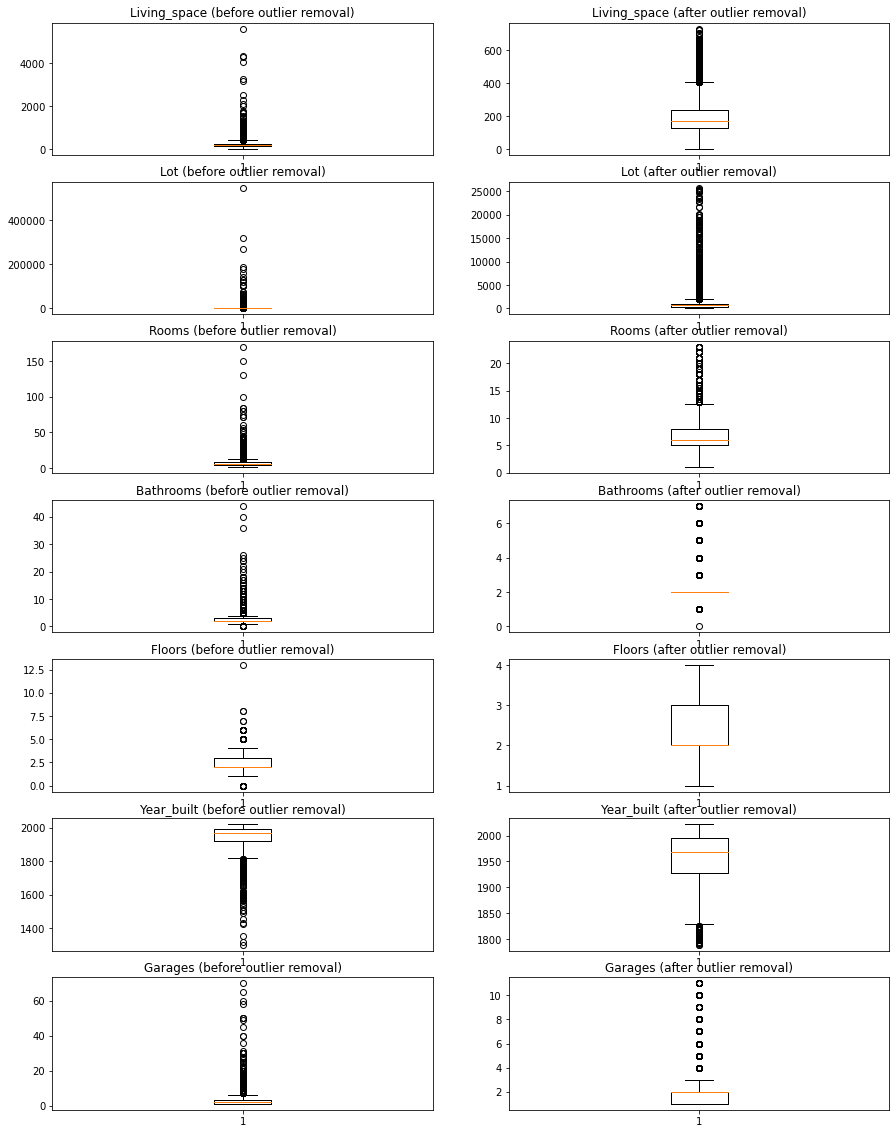

In [13]:

df_new = df_source[df_source['is_outlier_zscore'] == False]
fig = plt.figure( figsize=(15, 20))
id=1
for i in range(0,len(cols_to_zscore)):
    col = cols_to_zscore[i] 

    # old one
    ax = fig.add_subplot(7,2,id)
    ax.boxplot(df_source[col])
    ax.set_title(f"{col} (before outlier removal)")
    id=id+1

    # new one
    ax = fig.add_subplot(7,2,id)
    ax.boxplot(df_new[col])
    ax.set_title(f"{col} (after outlier removal)")
    id=id+1


In [14]:
### drop zscore cols
df_source = df_new.drop(columns= [col for col in df_new.columns if col.endswith('_zscore')])
df_source.columns

Index(['Unnamed: 0', 'Price', 'Type', 'Living_space', 'Lot', 'Rooms',
       'Bathrooms', 'Floors', 'Year_built', 'Furnishing_quality', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate', 'State', 'Garages',
       'Garagetype'],
      dtype='object')

### Data Transformation (One-hot encoding)

In [15]:
cols_categorical = list(df_source.select_dtypes(include='object'))
cols_categorical

['Type',
 'Furnishing_quality',
 'Condition',
 'Heating',
 'Energy_source',
 'Energy_certificate',
 'State',
 'Garagetype']

In [16]:
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of categorical columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for col in cols:
        # new df of one hot values
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=False)
        # Drop column B as it is now encoded
        df = df.drop(col ,axis = 1)
        # Join the encoded df
        df = df.join(one_hot)

    return df

df_source = one_hot(df_source, cols_categorical)
df_source.columns = df_source.columns.str.replace(' ','-')
df_source = df_source.drop(columns='Unnamed:-0')
df_source.sample(3)

,Price,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Garages,Type_Bungalow,Type_Castle,...,State_Sachsen-Anhalt,State_Schleswig-Holstein,State_Thüringen,Garagetype_Car-park-lot,Garagetype_Carport,Garagetype_Duplex-lot,Garagetype_Garage,Garagetype_Outside-parking-lot,Garagetype_Parking-lot,Garagetype_Underground-parking-lot
5306,420000.0,121.0,793.0,4.0,1.0,2.0,2011.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2074,390000.0,120.0,716.0,4.0,1.0,1.0,1964.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2229,960000.0,181.0,504.0,9.0,2.0,3.0,2008.0,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Data Transformation (Rearrange Dataframe)

In [17]:
# split into X and Y
col_y = "Price"
df_y:pd.DataFrame = df_source.drop(df_source.columns.difference([col_y]), 1)
df_X:pd.DataFrame = df_source.drop(columns=col_y)
df_source = pd.concat([df_X, df_y], axis=1, join='inner')
df_source.sample(2)

,Living_space,Lot,Rooms,Bathrooms,Floors,Year_built,Garages,Type_Bungalow,Type_Castle,Type_Corner-house,...,State_Schleswig-Holstein,State_Thüringen,Garagetype_Car-park-lot,Garagetype_Carport,Garagetype_Duplex-lot,Garagetype_Garage,Garagetype_Outside-parking-lot,Garagetype_Parking-lot,Garagetype_Underground-parking-lot,Price
3544,130.0,373.0,6.0,2.0,2.0,1935.0,2.0,0,0,0,...,0,0,0,0,0,0,0,1,0,330000.0
410,200.0,1291.0,7.0,2.0,2.0,1953.0,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1100000.0


### Data Reduction (Feature Selection)

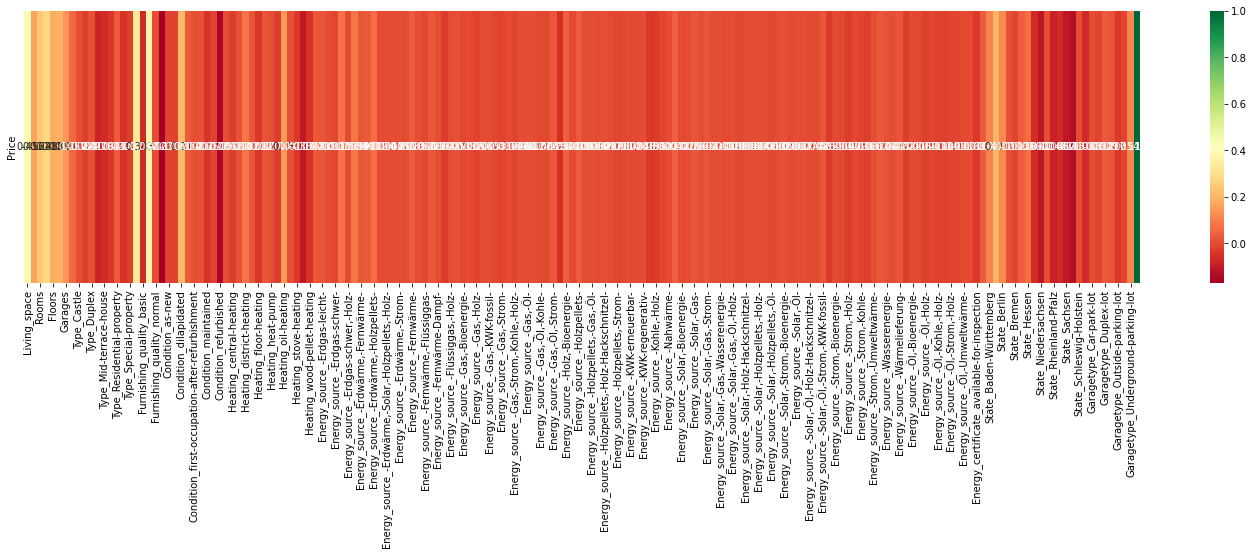

In [18]:
'''
Plot correlation between price and all features to get an idea what kind of features have an impact.
'''
# plot heat map showing features which have biggest effect on price
plt.figure(figsize=(25,5))
g=sns.heatmap(df_source.corr().loc[[col_y],:],annot=True,cmap="RdYlGn")

### Scale column

In [19]:
# from sklearn.preprocessing import StandardScaler
# 
# k = 3
# # only scale columns which are not one hot encoded
# scaler = StandardScaler().fit(X_train[:,:k])
# 
# def preprocessor(X):
#   A = np.copy(X)
#   A[:, :k] = scaler.transform(A[:, :k])
#   return A
# 
# X_train, X_test = preprocessor(X_train), preprocessor(X_test)

# Learning Algorithms

In [37]:
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # a lot of Decision Trees
from sklearn.neighbors import KNeighborsRegressor

def get_top_features(df, col_y="Price", min_corr_factor=0.2):
    ''' DATA REDUCTION: Feature Selection
    Select best (high correlation) features from data set
    '''
    cor = df.corr()
    cor_target = abs(cor[col_y])

    # get most significant features which correlate with output-variable y
    relevant_features = cor_target[cor_target > min_corr_factor]
    selected_features = list(relevant_features.index)
    print(f"These are selected features: {selected_features}")

    return selected_features


def split_df_into_train_test(df):
    ''' DATA TRANSFORMATION
    split dataframe into training and test data
    '''
    X = df.to_numpy()[:, :-1]
    y = df.to_numpy()[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #print(f"Shapes for train/test/val:\t {X_train.shape}, {y_train.shape} / {X_test.shape}, {y_test.shape}")
    return X_train, X_test, y_train, y_test

def calc_loss(model, X, y):
    '''calculate loss of a model'''
    return math.floor(mse(model.predict(X), y, squared=False))

### Experiment 1: Plot Model for different top features

These are selected features: ['Living_space', 'Rooms', 'Bathrooms', 'Type_Villa', 'Furnishing_quality_luxus', 'Condition_dilapidated', 'Price']

Feature:		Living_space
Loss for training set:	462327
Loss for test set:	432021
[2316.24343467]
--------------------------------------

Feature:		Rooms
Loss for training set:	498827
Loss for test set:	477924
[39728.89674865]
--------------------------------------

Feature:		Bathrooms
Loss for training set:	494012
Loss for test set:	472122
[143750.11519455]
--------------------------------------

Feature:		Type_Villa
Loss for training set:	485939
Loss for test set:	460452
[912365.79958095]
--------------------------------------

Feature:		Furnishing_quality_luxus
Loss for training set:	480856
Loss for test set:	440648
[877203.66350934]
--------------------------------------

Feature:		Condition_dilapidated
Loss for training set:	503509
Loss for test set:	478402
[327666.67210008]
--------------------------------------


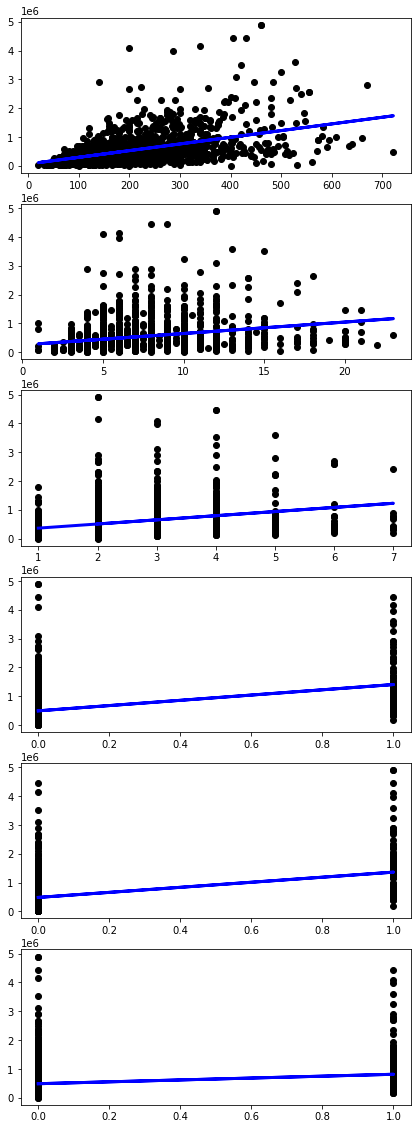

In [56]:
# calc list of top features
list_top_features = get_top_features(df=df_source, min_corr_factor=0.2)
list_top_features.remove(col_y)



fig, axs = plt.subplots(nrows=len(list_top_features))
fig.set_figheight(20)
fig.set_figwidth(7)


for i, feature in enumerate(list_top_features):
    print(f"\nFeature:\t\t{feature}")
    # create dataframe only with one feature
    df_model = df_source.drop(columns=df_source.columns.difference([feature, col_y]))

    # split dataframe into train & test
    X_train, X_test, y_train, y_test = split_df_into_train_test(df=df_model)

    # train linear regression model
    model_linear = LinearRegression().fit(X_train, y_train)

    # show score
    loss_train = calc_loss(model_linear, X_train, y_train)
    loss_test  = calc_loss(model_linear, X_test, y_test)
    print(f"Loss for training set:\t{loss_train}")
    print(f"Loss for test set:\t{loss_test}")
    print(f"{model_linear.coef_}")
    print(f"--------------------------------------")

    
    # pred
    y_pred = model_linear.predict(X_test)


    axs[i].ticklabel_format(useOffset=False)
    axs[i].scatter(X_test, y_test, color="black")
    axs[i].ticklabel_format(style='plain')



    


In [ ]:
'''
EXPERIMENT 2: Look at score difference for different amount of features
'''

# get_n_top_features(n=3)
model_knn = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
model_rfr = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
model_linear = LinearRegression().fit(X_train, y_train)
# 